<a href="https://colab.research.google.com/github/AuliaFauzan/Scaling_in_KNN/blob/main/Scaling_in_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

## Data Preparation

### Load dataset titanic

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Simple EDA

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


Here, we know that there's null value/NA in features 'age', 'embarked', 'deck', and 'embark_town'. We also know the data type of each feature.

In [ ]:
# Transform categorical features to numeric
titanic['sex'].replace('female', 0, inplace=True)
titanic['sex'].replace('male', 1, inplace=True)

In [ ]:
 # drop missing values
 titanic.dropna(subset=['age'],inplace=True)

In [ ]:
# Set feature & target variable
fitur = ['pclass', 'sex', 'age', 'fare']
target = ['survived']

I use 'pclass', 'sex', 'age', and 'fare' to predict survival rate of titanic passenger. So, I use 'survived' as target variable. If the 'survived' variable is written 1, then the passenger is alive. Vice versa.

In [ ]:
X = titanic[fitur]
y = titanic[target]

In [ ]:
titanic['survived'].value_counts()

0    424
1    290
Name: survived, dtype: int64

### Split the data

I split the data to train and test with 80:20 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    test_size = 0.2, 
    random_state = 42)

## Modelling

### KNN Model without scaling

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_predict_class = knn.predict(X_test)

Let's see the model accuracy.

In [ ]:
print('Model accuracy in dataset:', accuracy_score(y_test,y_predict_class))

Model accuracy in dataset: 0.6573426573426573


### KNN Model with scaling

In [ ]:
#Scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_predict_class = knn.predict(X_test_scaled)

Then let's see the model accuracy again.

In [ ]:
print('Model accuracy in dataset:', accuracy_score(y_test,y_predict_class))

Model accuracy in dataset: 0.7972027972027972


As we can see, the model accuracy increase. The accuracy before scaling is around 65% and after scaling, we get 79% accuracy model.

### Finding the best 'k'

Before, we use 'n_neighbors=3' in our KNN model. This value of k is not optimal, therefore I will try to find the best 'k' for our final model.

In [ ]:
# I search the best 'k' with looping, and 'k' value in range 1-150
k = range(1,150,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

Text(0, 0.5, 'accuracy')

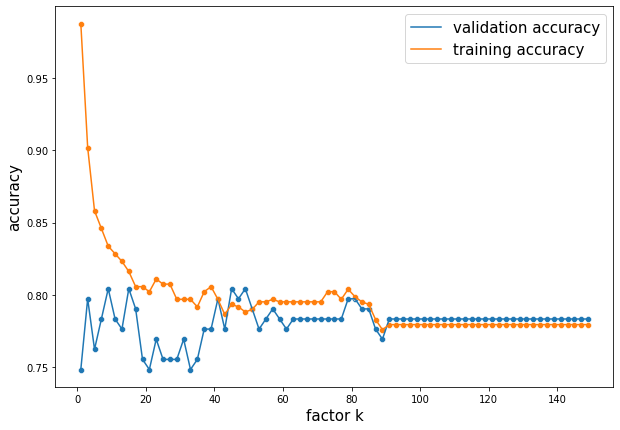

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(k,testing_accuracies)
sns.scatterplot(k,testing_accuracies)
sns.lineplot(k,training_accuracies)
sns.scatterplot(k,training_accuracies)
plt.legend(['validation accuracy','training accuracy'], fontsize = 15)
plt.xlabel('factor k', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)
# plt.xticks(list(k))

In [ ]:
print('best k:', best_k)
print('accuracy:', score)

best k: 9
accuracy: 0.8041958041958042


Now, we know that the best 'k' is 9, and with best 'k', we get 80% model accuracy.